# Course-End Project 2: Creating Chorts of Songs

**Problem Scenario:**

The customer always looks forward to specialized treatment, whether shopping over an e-commerce website or watching Netflix. They want what they might like to see. To keep the customers engaged, it is also crucial for companies to always present the most relevant information. Spotify is a Swedish audio streaming and media service provider. The company has over 456 million active monthly users, including over 195 million paying subscribers, as of September 2022. The company intends to create cohorts of different songs that will aid in the recommendation of songs to users based on various relevant features. Each cohort would contain similar types of songs.

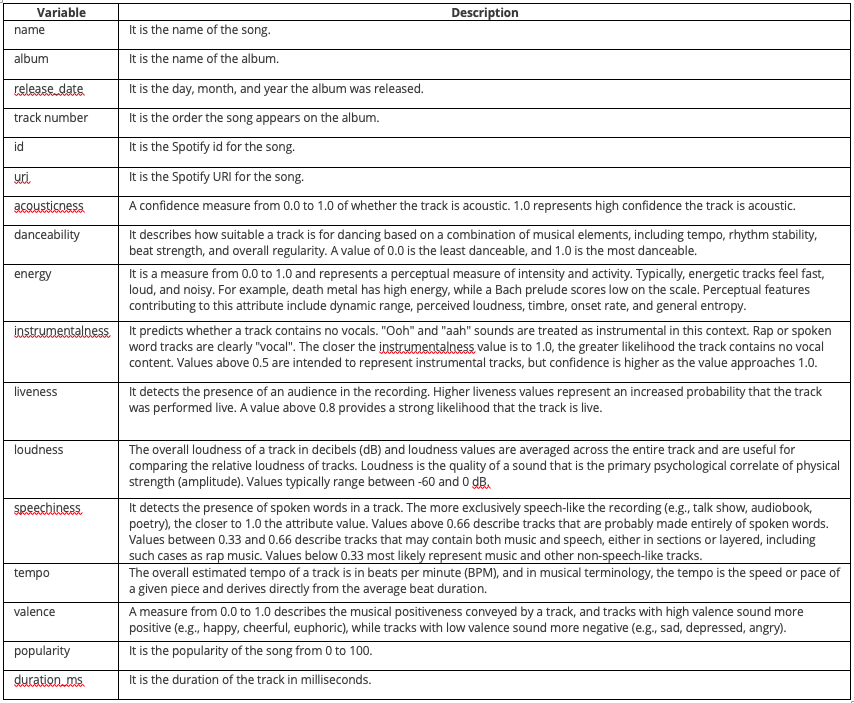


**Problem Objective:**


As a data scientist, you should perform exploratory data analysis and perform cluster analysis to create cohorts of songs. The goal is to gain a better understanding of the various factors that contribute to creating a cohort of songs.

## Steps to Perform:

**1. Initial Data Inspection and Cleaning.**
- Check whether the data has duplicates, missing values, irrelevant (erroneous entries) values, or outliers.

**2. Depending on your findings, clean the data for further processing.**

**3. Perform Exploratory Data Analysis and Feature Engineering**
- Use appropriate visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album.
- Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern.
- Discover how a song's popularity relates to various factors and how this has changed over time.
- Comment on the importance of dimensionality reduction techniques, share your ideas and explain your observations.


**4. Perform Cluster Analysis**
- Identify the right number of clusters.
- Use appropriate clustering algorithm.
- Define each cluster based on the features.


**Import the required Python Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

**Upload the dataset and name it "df"**

In [ ]:
df = pd.read_csv('rolling_stones_spotify.csv')

In [ ]:
df.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

**Data Description:**


This dataset contains data from Spotify's API about all albums for the Rolling Stones listed on Spotify. It is important to note that all songs have unique IDs.



## **1.Initial Data Inspection and Cleaning:**


**Check for Duplicate Entries:**

In [5]:
duplicates = df[df.duplicated()]
df = df.drop_duplicates()

- Use pandas to check for duplicate rows in the dataset.
- If there are duplicates, consider removing them to ensure the uniqueness of the data.

**Check for Missing Values:**

In [6]:
missing_values = df.isnull().sum()
missing_values

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

- No missing values in the dataset.

**Check for Outliers:**

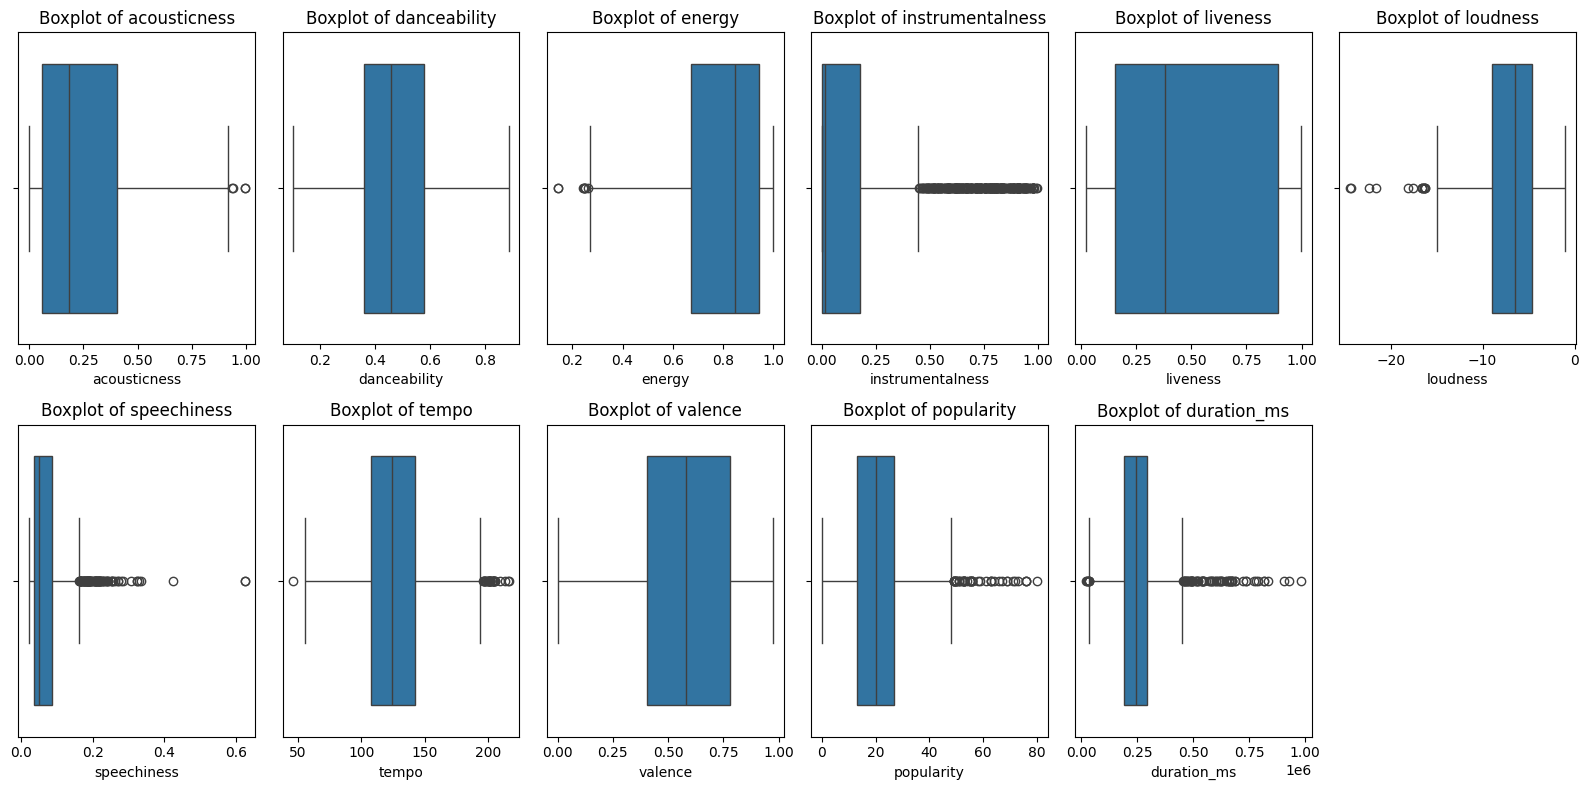

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame named 'df'

# List of numerical columns
numerical_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']

# Box plots for each numerical column to identify outliers
plt.figure(figsize=(16, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 6, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


**Observations:**

- Popularity: High-popularity songs may have higher values and might be considered as outliers, but they are relevant and important for analysis.
- Loudness: Extremely low or high loudness values might indicate outliers. However, in the context of music, these extreme values might be valid for genres like classical or heavy metal.
- Duration_ms: Very short or very long durations might be outliers, but they can be valid for interludes, intros, or extended compositions.
- Speechiness: In the context of music analysis, the "speechiness" feature in a dataset typically represents the presence of spoken words in a track. A higher speechiness value suggests that a song is more likely to be dominated by speech-like elements, such as spoken word, talk show, audiobook, or similar content. On the other hand, lower speechiness values indicate that a song is more likely to be purely instrumental or non-speech-like. When examining outliers in the "speechiness" feature, it's essential to consider the nature of the dataset and the characteristics of the music being analyzed.
- interpreting outliers in 'instrumentalness' and 'loudness' requires an understanding of music genres, production techniques, and the goals of the analysis.



**Data Cleaning Based on Findings:**

Based on the findings from the above steps, clean the data by removing duplicates, handling missing values, and addressing outliers.

- No Missing Values in the dataset.
- Duplicates were handled.
- Interpreting outliers in the context of music analysis, requires an understanding of music genres, production techniques, and the goals of the analysis. Consultation with domain experts can enhance the interpretation and ensure that outliers are considered in the appropriate context. As no expert advise or domain knowledge is availble, we do not want to treat the outliers without understanding its appropriate context.

# **2. Perform Exploratory Data Analysis and Feature Engineering:**

*Use appropriate visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album.*

**2.1.1 Explore the Data Distribution**

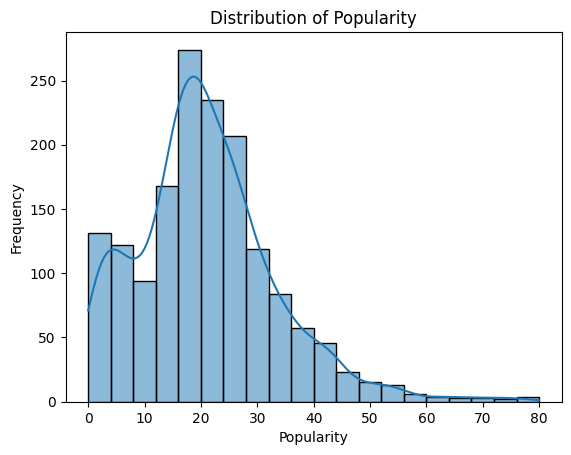

In [8]:

sns.histplot(df['popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


**Observation:**

- Exploring the distribution of the 'popularity' variable to understand the popularity of songs in the datase we witness a right tail distribution.
- It peaks at 20 and is concentrated between 0 and 35.
- Its got a descend from the the 20 and we witness a downward slide going down right upto 80.

**2.1.2 Identify Popular Songs:**

Define a threshold for what you consider a "popular" song based on the 'popularity' column.

In [11]:

popular_threshold = 60
popular_songs = df[df['popularity'] >= popular_threshold]


- Looking at the popularity distribution of the songs, we decide the threshold to be 60.

**2.1.3 Explore Popular Songs by Album:**

Analyze the distribution of popular songs across different albums.

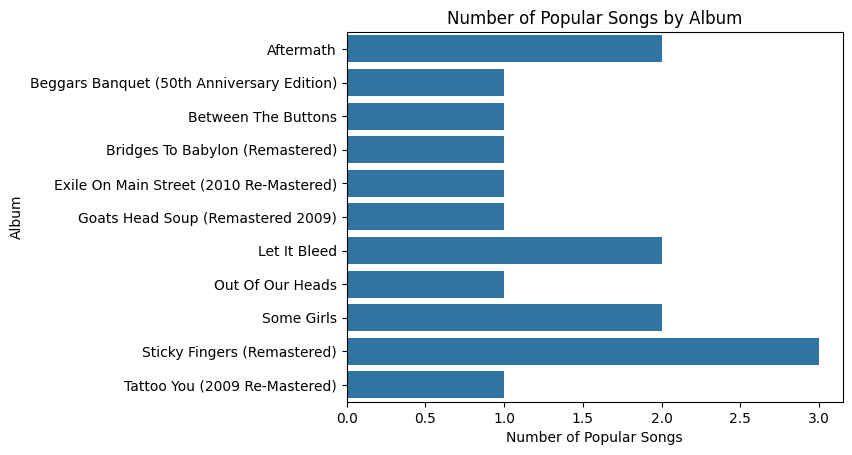

In [12]:
popular_albums = popular_songs.groupby('album')['name'].count().reset_index()

sns.barplot(x='name', y='album', data=popular_albums, orient='h')
plt.title('Number of Popular Songs by Album')
plt.xlabel('Number of Popular Songs')
plt.ylabel('Album')
plt.show()


**Observation:**
- "Sticky Fingers (Remastered)" with score of 3.0 tops the number of popular songs in an album, followed equally with a score of 2.0 are "Aftermath", Let It Bleed" and "Some Girls".
- The other seen here are equally popular with a score of 1.0.

**2.1.4 Recommend Two Albums:**

Based on the visualizations, recommend three albums with the highest number of popular songs.

In [13]:
top_albums = popular_albums.nlargest(3, 'name')['album'].tolist()
print("Recommended Albums:", top_albums)


Recommended Albums: ['Sticky Fingers (Remastered)', 'Aftermath', 'Let It Bleed']


# **2.2 Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern**

*To perform exploratory data analysis (EDA) and dive deeper into different features of songs to identify patterns, you can use various visualizations and statistical analysis. *

**2.2.1 Pairplot to visualise the relationship between numerical variables**

*Display basic statistics of numerical columns*

In [ ]:
print(df.describe())

        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.2334

- This gives a clarity to the distribution of the data in each variable.

*Pairplot to visualize relationships between numerical features*

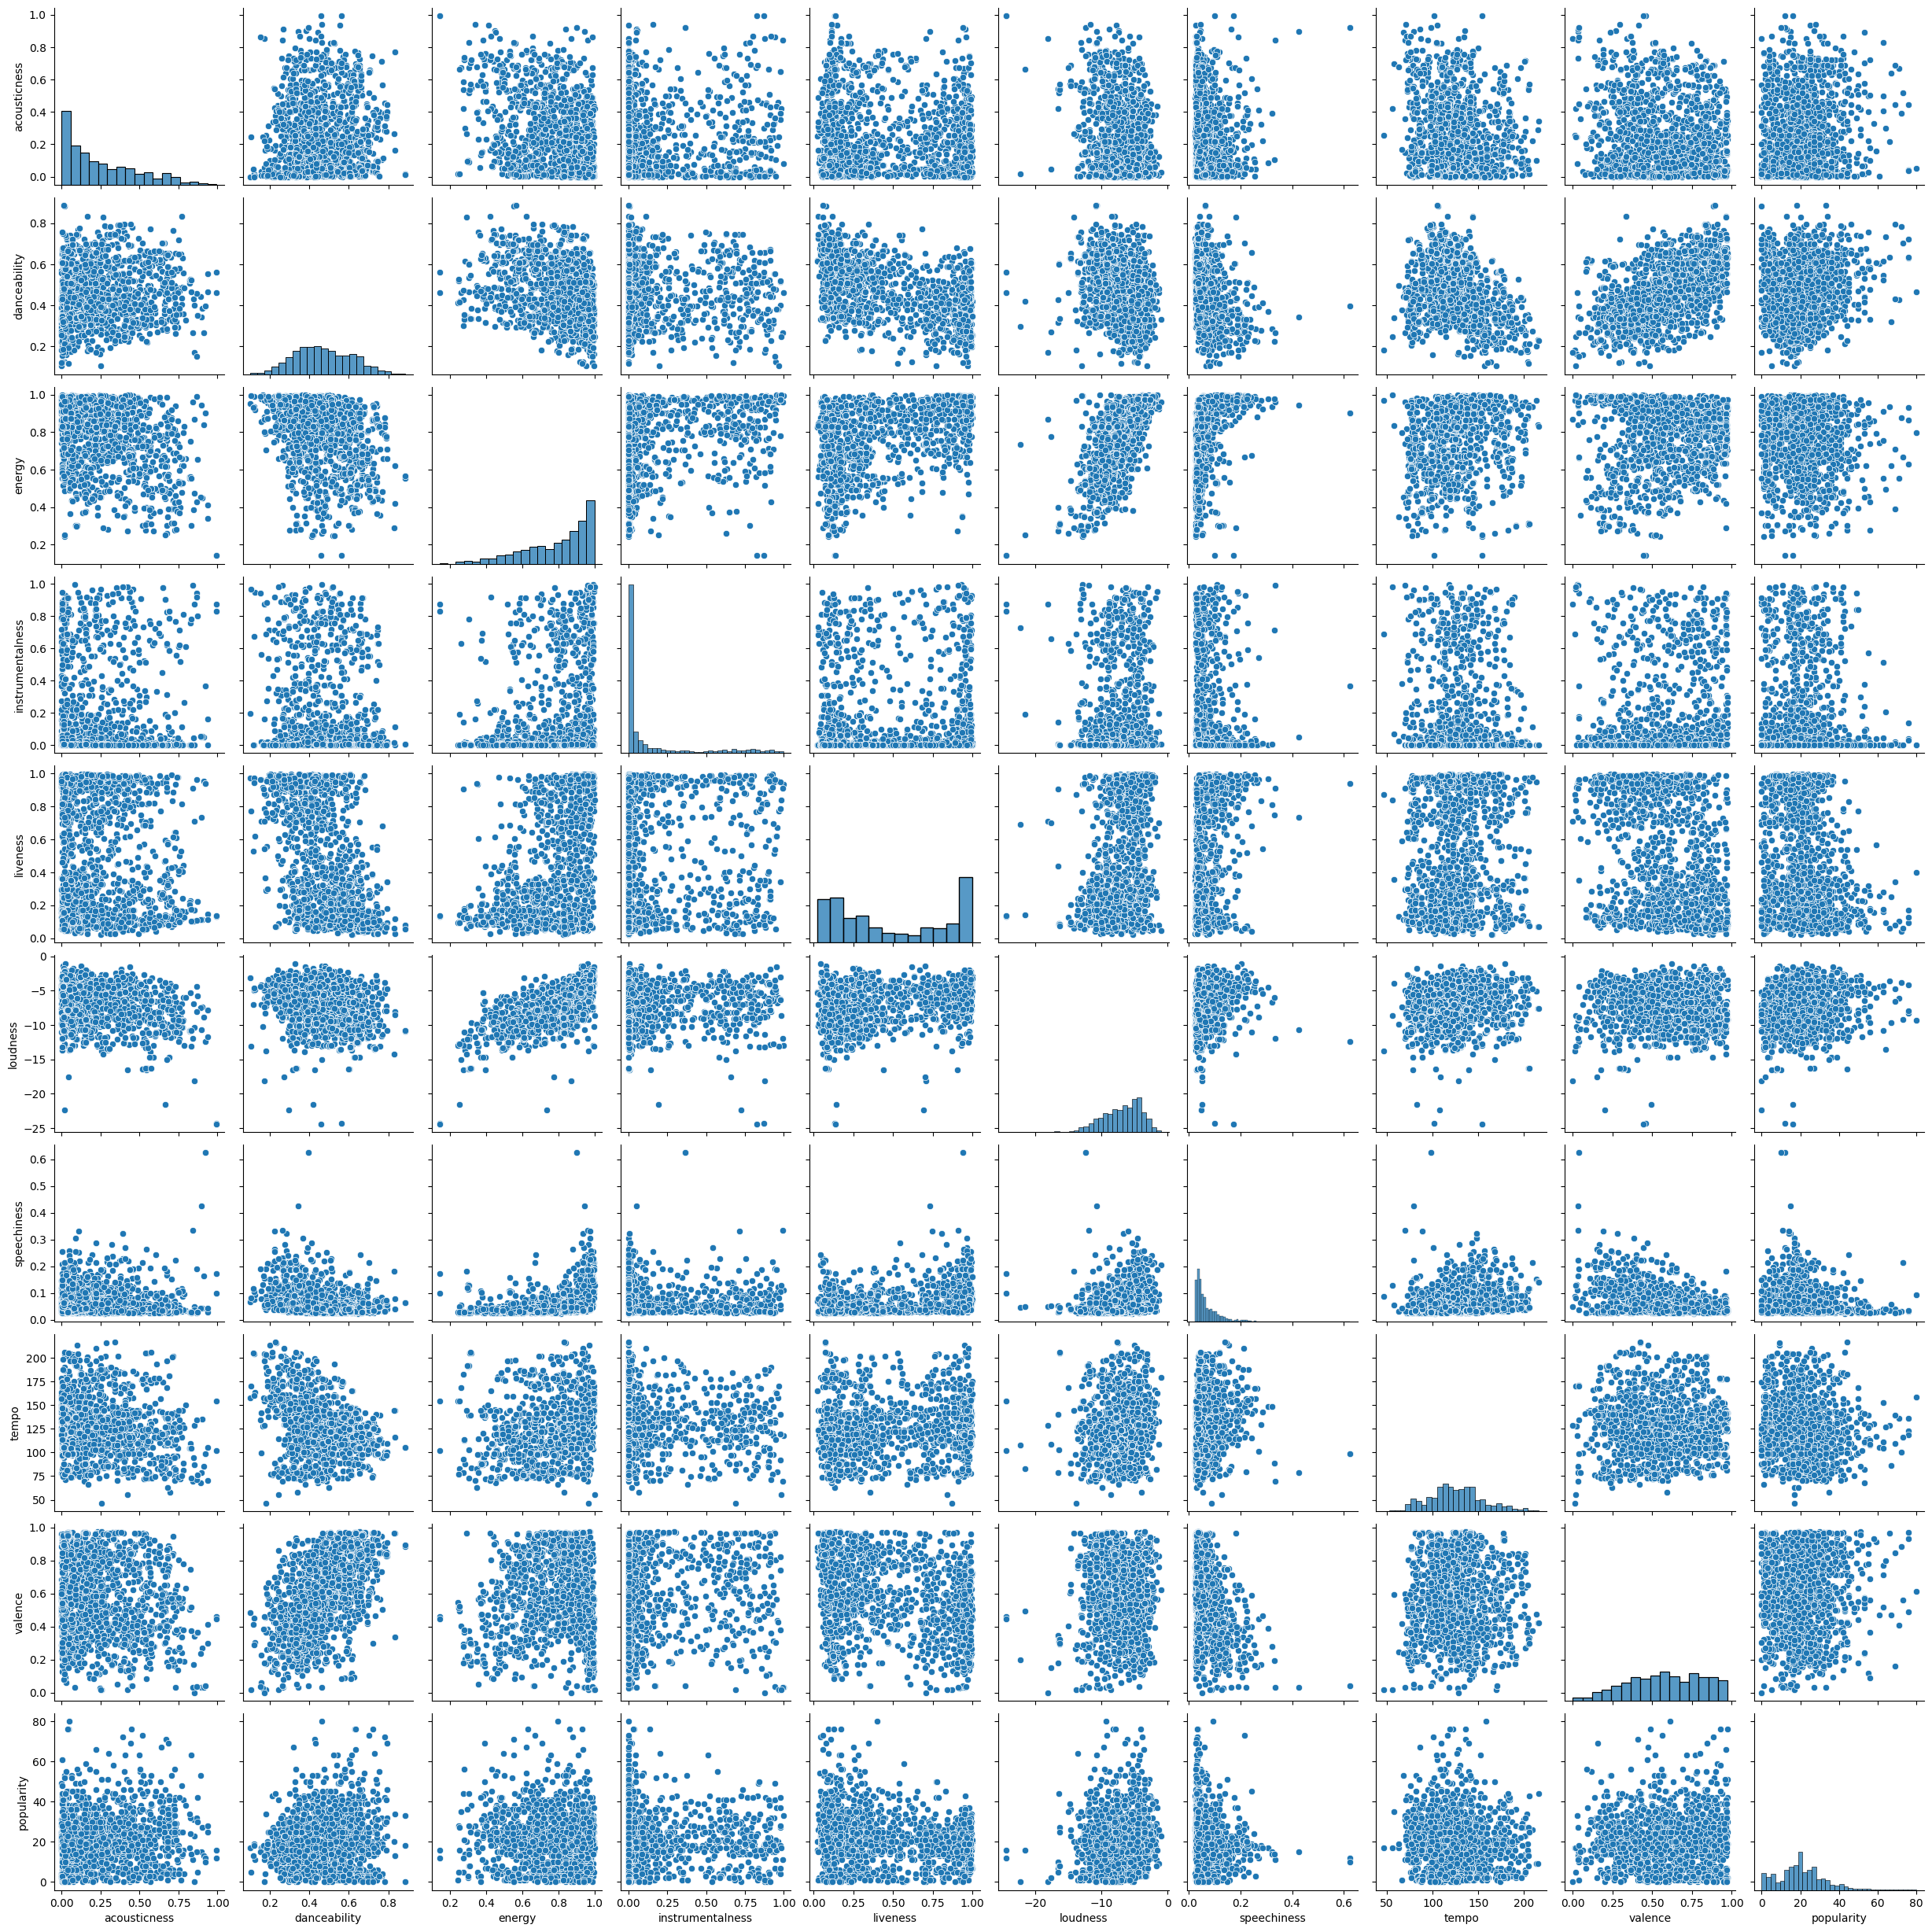

In [ ]:
sns.pairplot(df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']])
plt.show()


**Observations:**

**Histogram**
- The distribution for "acouticsness" and "speechiness" have a right tail distribution.
- "dancebility", "loudness", 'valance" & "tempo"seems comparitively normally distibuted.
- "energy" has a left tailed distribution.
- "instrumentalness" has an extreme right tailed distribution with the concentration of the values at the extreme left and very scarely distributed to its right.
- "liveliness" has a spread out distibution with a dip in between before it again elevates towards its tail end.
- "popularity" has a spread out normal distribution peaking at 20 and concentrated around 10 to 30.

**Scatter Plot**
- There seems a positive correlation between "popularity" and "acousticness".
- A negative correlation between "popularity" and "energy", "popularity" and "valence".
- No correlation witnessed between "tempo" and "liveliness", "valanece" and "liveliness', "instrumentalness" and "livelinesss".


**2.2.2 Correlation Heatmap**

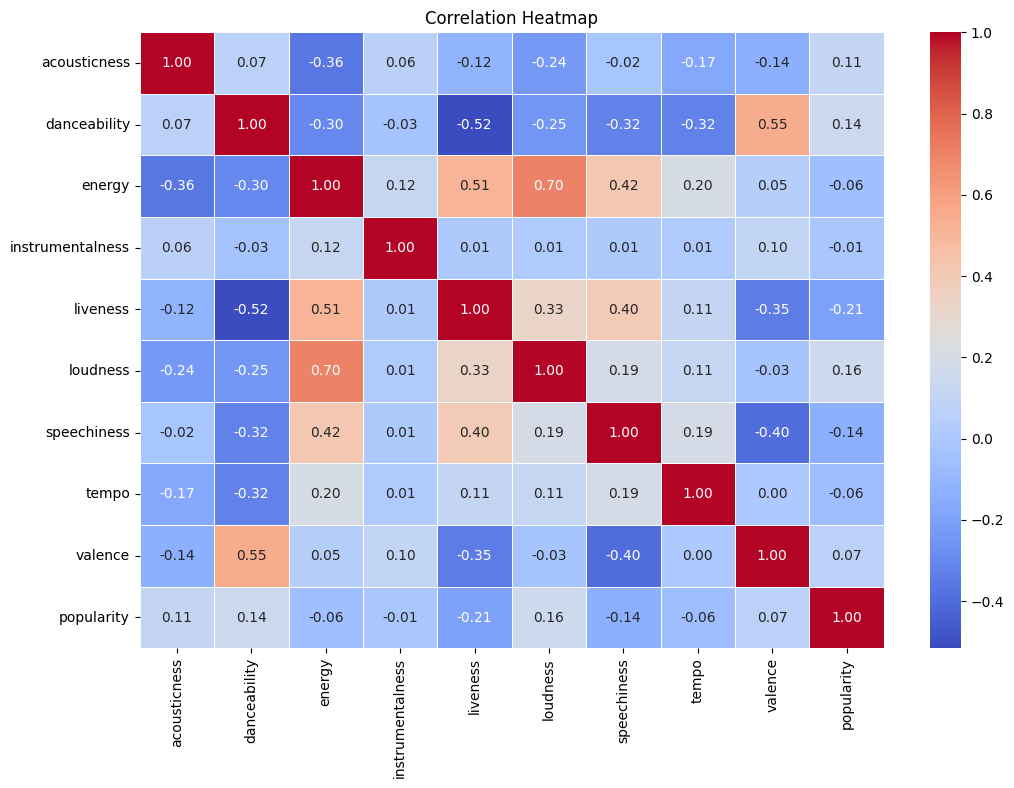

In [14]:
correlation_matrix = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**Observations:**

- Highest positive corrleation witnessed between "loudness" and "energy" follwed by "valence" and "danceability" , 'spechiness and 'energy', "spechiness" and "liveliness'.
- Highest negative correlation discovered between "liveliness" and "danceability" followed by "energy" and "acousticness", "valance" and "liveliness".

**Distribution of some key features**

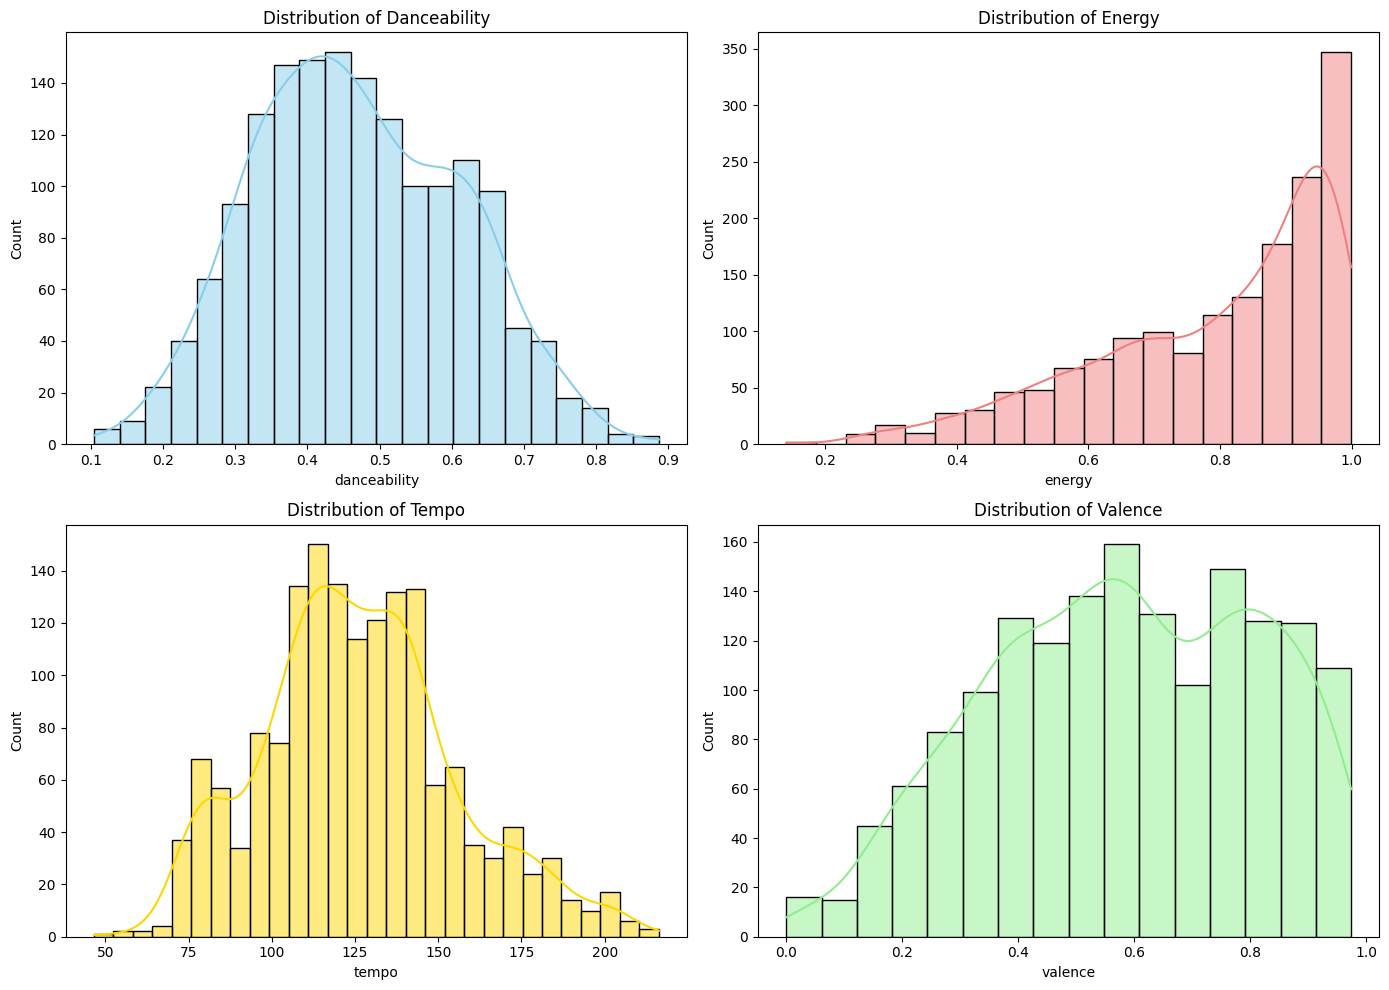

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

sns.histplot(df['danceability'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Danceability')

sns.histplot(df['energy'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Distribution of Energy')

sns.histplot(df['tempo'], kde=True, ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Distribution of Tempo')

sns.histplot(df['valence'], kde=True, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Distribution of Valence')

plt.tight_layout()
plt.show()

**Observations:**
- Normal Distribution seen in "tempo" and "danceability".
- Left tailed Distribution witnessed in "valence" and "energy"

## 2.3 Discover how a song's popularity relates to various factors and how this has changed over time.

- Creating a time based analysis
- Convert 'release_date' to datetime format



**2.3.1 Scatter plot of Popularity vs. Release Date**

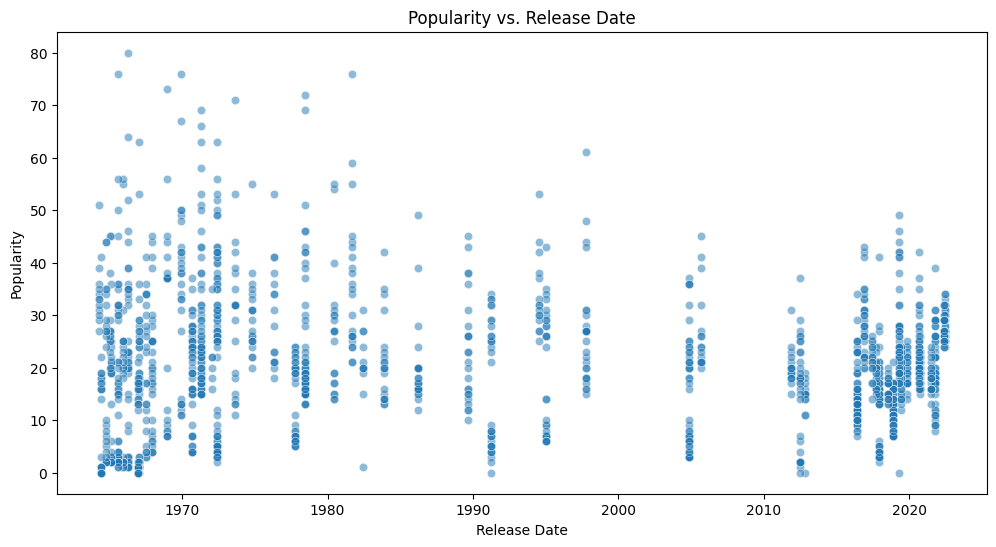

In [16]:

# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Scatter plot of Popularity vs. Release Date
plt.figure(figsize=(12, 6))
sns.scatterplot(x='release_date', y='popularity', data=df, alpha=0.5)
plt.title('Popularity vs. Release Date')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.show()


**Observations:**
Plotting the popularity of the song from it time of release to date, shows the way the song has been stayed popular. Its popularity seems to have increased more during the recent times compared to the 80's, 90s, and 2000s.

**2.3.2 Average popularity trend over time

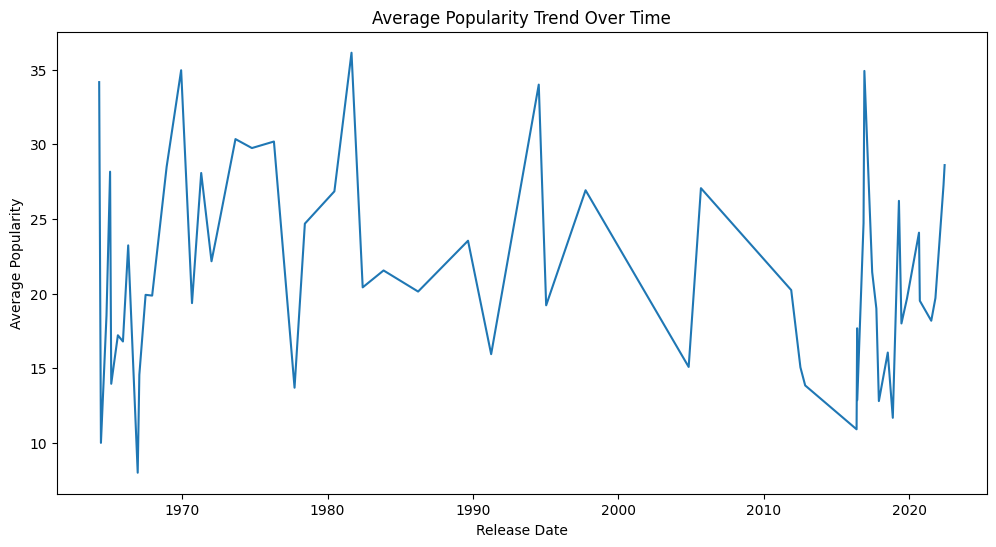

In [17]:

# Line plot to show the average popularity trend over time
df_time_series = df.groupby('release_date')['popularity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='popularity', data=df_time_series)
plt.title('Average Popularity Trend Over Time')
plt.xlabel('Release Date')
plt.ylabel('Average Popularity')
plt.show()


**Observations:**
- The Average popularity trends seems to have been inconsistent all along.
- The trend has been inconsistent and swung all along. the average populatrity was at its lowest few years after its release, after which it reached the peak of its popularity and then again seen downward trends.
- Comparitevly its stayed consistent between 80's and 90s.
- It managed to reach its peak again in the recent years.

**2.3.3 Correlation Heatmap between popularity and other features

<ipython-input-18-f56f6fb40d24>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


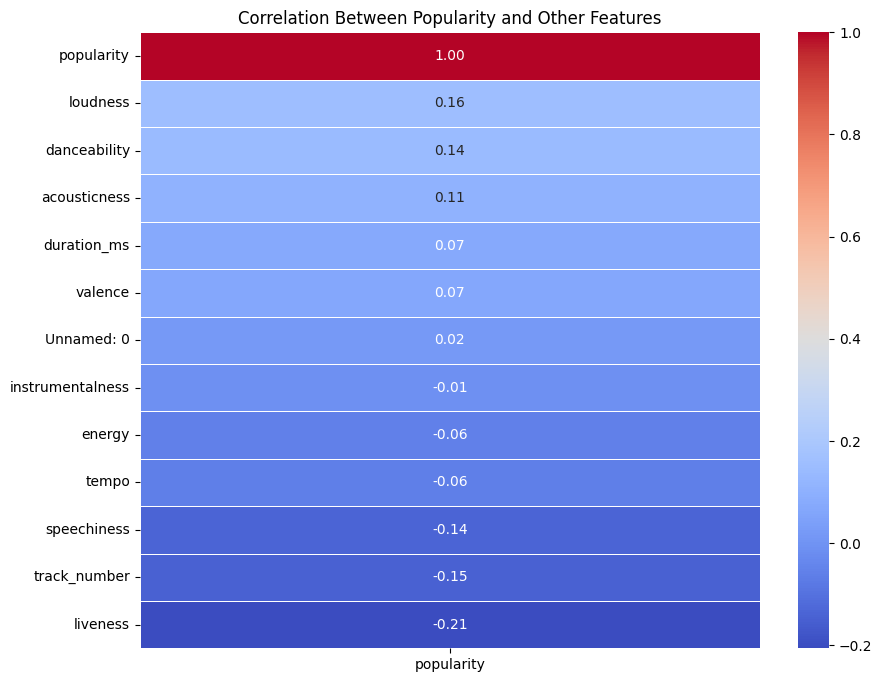

In [18]:
correlation_matrix = df.corr()
popularity_correlation = correlation_matrix['popularity'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(popularity_correlation.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Between Popularity and Other Features')
plt.show()

**Observations:**
- Looking at the 'popularity' variable, we dont see a very high positive correlation with any particular variable.
- 'loudness' and 'dancebility' have the most positive correlation.
- Negative correlation with various degrees are witnessed with variables like 'liveness', 'track_number', 'speechiness', etc.

#2.4 Comment on the importance of dimensionality reduction techniques, share your ideas and explain your observations.

Dimensionality reduction techniques play a crucial role in analyzing and interpreting complex datasets with a large number of features.

Curse of Dimensionality:

As the number of features increases, the volume of the data space grows exponentially. This phenomenon, known as the curse of dimensionality, can lead to sparse and redundant data, making it challenging to model and analyze effectively.


Computational Efficiency:

High-dimensional datasets often require more computational resources and time for processing and analysis. Dimensionality reduction techniques help reduce the number of features, leading to more efficient algorithms and faster computations.


Visualization:

It is difficult to visualize and interpret data in high-dimensional spaces. Dimensionality reduction allows for the transformation of data into lower-dimensional representations, making it easier to visualize and identify patterns or clusters.



Improved Model Performance:

Many machine learning models suffer from overfitting when faced with a high-dimensional dataset, where they might perform well on the training data but poorly on new, unseen data. Dimensionality reduction can help mitigate overfitting, leading to more robust and generalizable models.



Feature Selection:

Dimensionality reduction often involves selecting a subset of the most informative features. This process can help identify the most relevant variables for a given task, reducing noise and improving the quality of the data.



Interpretability:

Simplifying the dataset by reducing its dimensionality enhances interpretability. In a lower-dimensional space, relationships between variables become more apparent, and it becomes easier to communicate findings to stakeholders or non-technical audiences.


Handling Multicollinearity:

High-dimensional datasets may exhibit multicollinearity, where features are highly correlated. This can adversely affect the stability and interpretability of models. Dimensionality reduction can mitigate multicollinearity by capturing the underlying structure in a smaller number of dimensions.



Noise Reduction:

Dimensionality reduction techniques aim to capture the essential structure of the data while discarding noise and irrelevant details. This results in a more compact representation of the dataset that focuses on the most significant information.


Popular dimensionality reduction techniques include
- Principal Component Analysis (PCA)
- t-distributed Stochastic Neighbor Embedding (t-SNE)
- Uniform Manifold Approximation and Projection (UMAP).

#3. Cluster Analysis:

o	Identify the right number of clusters

o	Use appropriate clustering algorithm

o	Define each cluster based on the features

Performing cluster analysis involves grouping similar observations into clusters based on certain features. To identify the right number of clusters and define each cluster, you can use techniques such as the **elbow method** for determining the optimal number of clusters and apply a clustering algorithm.

**Using the k-means clustering algorithm**

**3.1 Identify the right number of clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

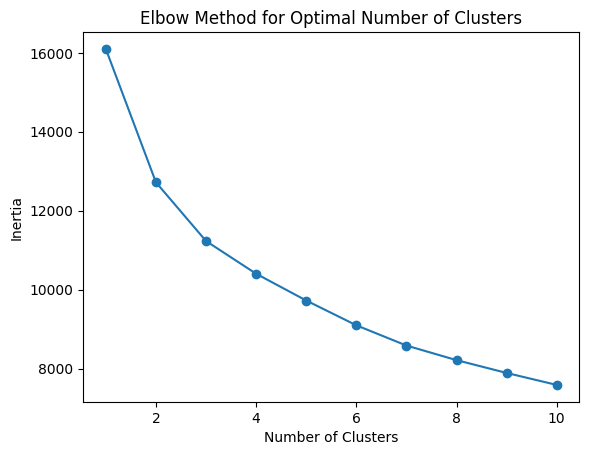

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select relevant features for clustering
selected_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_features])

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


# Plot the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


- Based on the elbow method, the optimal number of clusters chosen will be 3 (i.e k=3)

**3.2 Use appropriate clustering algorithm**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


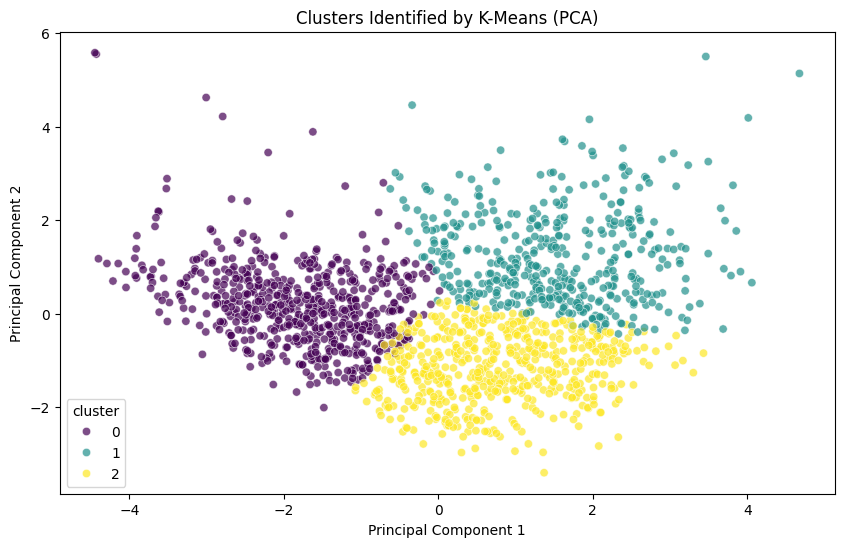

         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.185661      0.362546  0.921568          0.156890  0.822348   
1            0.423355      0.498393  0.569402          0.090611  0.278149   
2            0.186092      0.562661  0.825172          0.229920  0.295580   

         loudness  speechiness       tempo   valence  popularity  
cluster                                                           
0       -5.442671     0.104961  137.135940  0.456002   17.452769  
1       -9.774733     0.046300  115.976525  0.497420   21.210046  
2       -6.453704     0.048727  121.851054  0.787511   24.127240  


In [21]:
# Apply k-means clustering
optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans_optimal.fit_predict(df_scaled)

# Visualize clusters in 2D using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['cluster'], palette='viridis', alpha=0.7)
plt.title('Clusters Identified by K-Means (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Analyze cluster characteristics
cluster_means = df.groupby('cluster')[selected_features].mean()
print(cluster_means)


**Observation:**

 - I have used the **k-means clustering algorithm** and **the elbow method** to determine the optimal number of clusters.

 - The elbow method helps identify the point where the reduction in inertia (within-cluster sum of squares) slows down, indicating a good choice for the number of clusters.

- After identifying the optimal number of clusters, the data is clustered using the selected algorithm, and clusters are visualized in 2D using PCA.
- Finally, the characteristics of each cluster are analyzed by calculating the mean values of selected features within each cluster.

**3.3 	Defining each cluster based on the features**

In [22]:
print("Cluster Characteristics:")
for i in range(optimal_k):
    print(f"\nCluster {i+1}:")
    print(cluster_means.loc[i])

Cluster Characteristics:

Cluster 1:
acousticness          0.185661
danceability          0.362546
energy                0.921568
instrumentalness      0.156890
liveness              0.822348
loudness             -5.442671
speechiness           0.104961
tempo               137.135940
valence               0.456002
popularity           17.452769
Name: 0, dtype: float64

Cluster 2:
acousticness          0.423355
danceability          0.498393
energy                0.569402
instrumentalness      0.090611
liveness              0.278149
loudness             -9.774733
speechiness           0.046300
tempo               115.976525
valence               0.497420
popularity           21.210046
Name: 1, dtype: float64

Cluster 3:
acousticness          0.186092
danceability          0.562661
energy                0.825172
instrumentalness      0.229920
liveness              0.295580
loudness             -6.453704
speechiness           0.048727
tempo               121.851054
valence               0

**3.3.1 Visual representation of the defined cluster using Bar Plots**

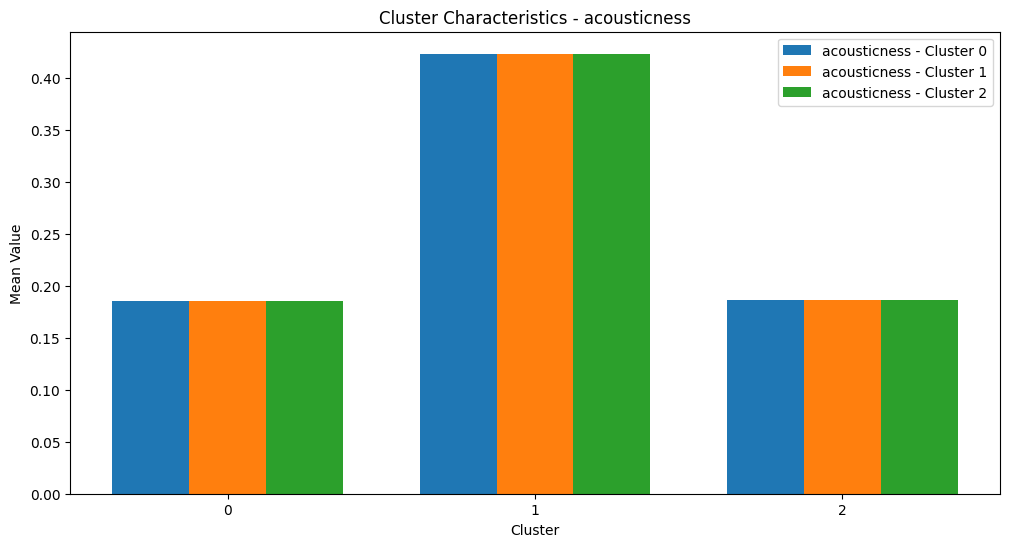

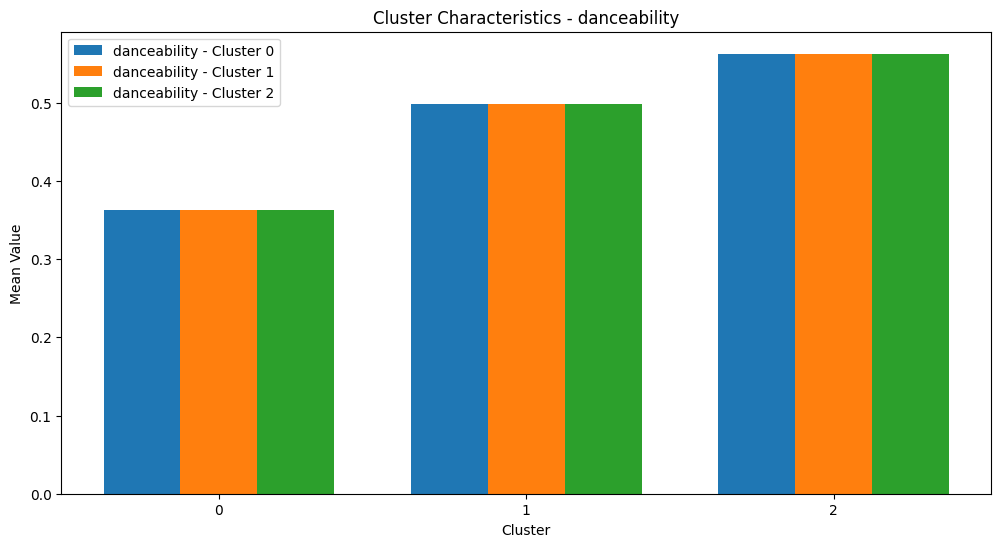

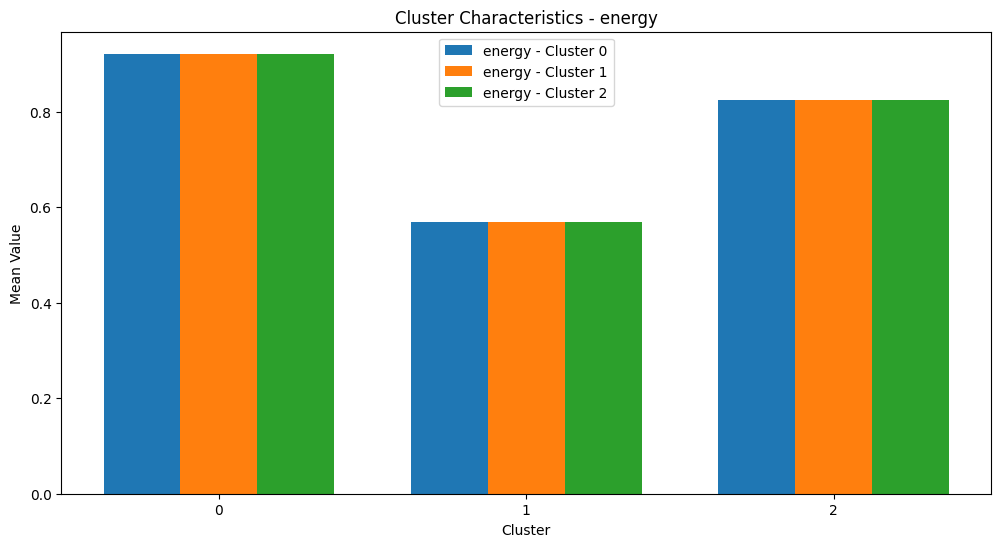

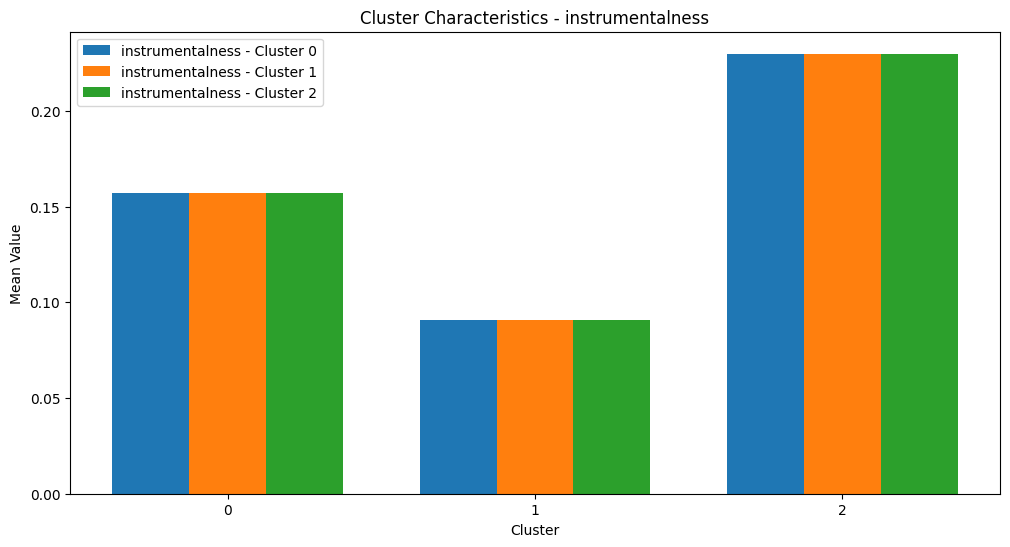

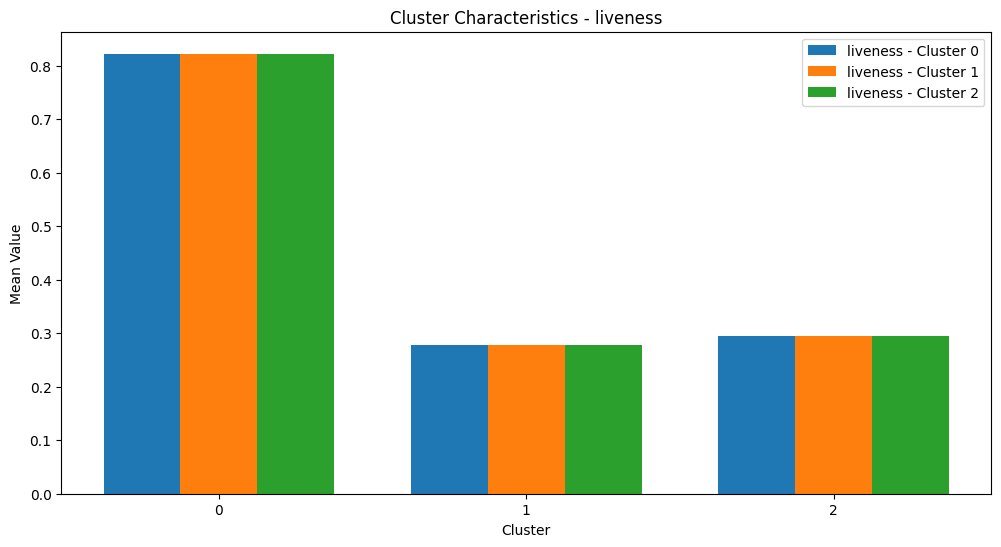

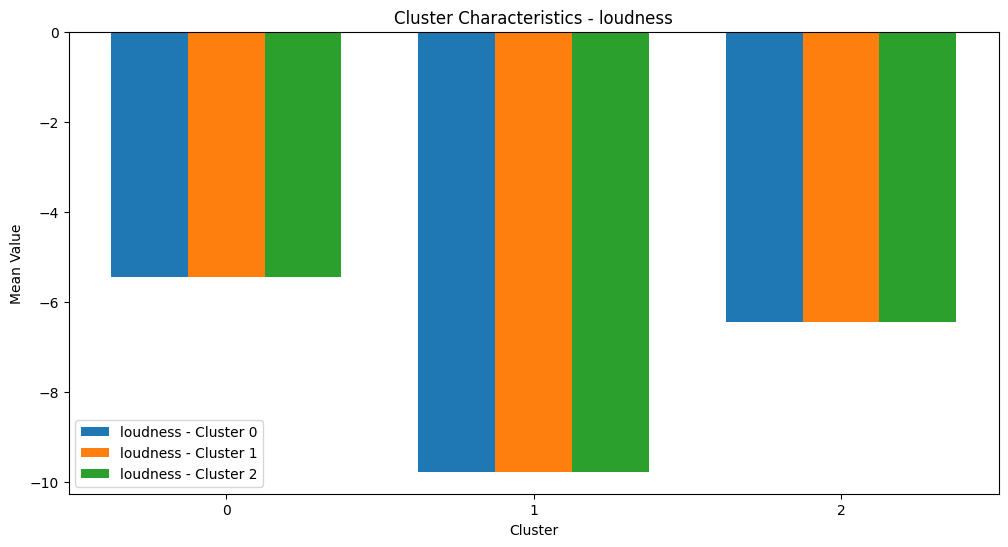

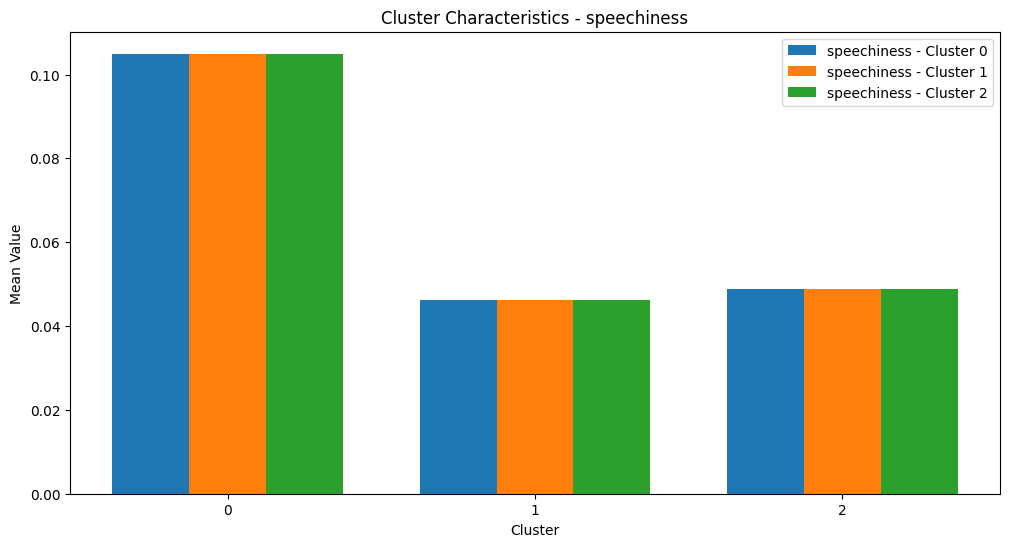

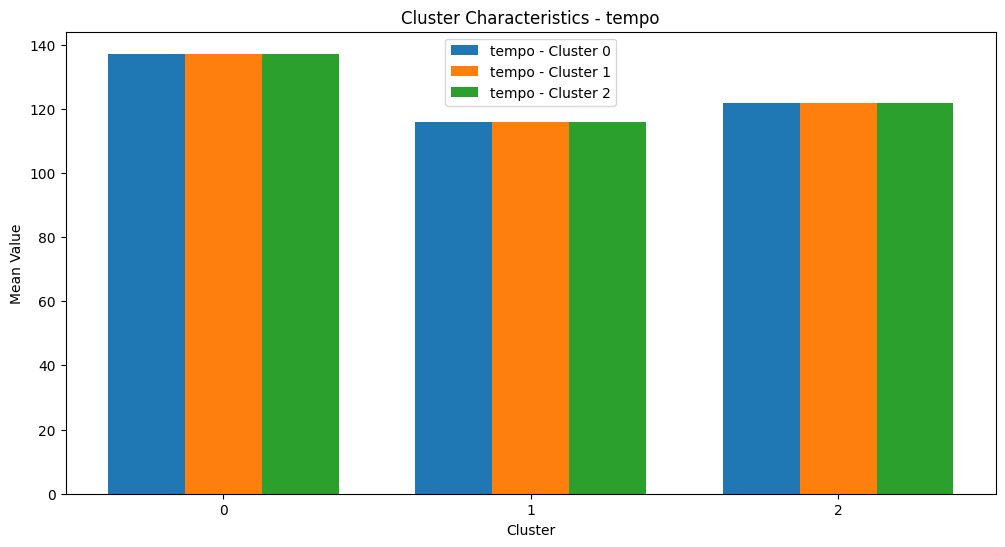

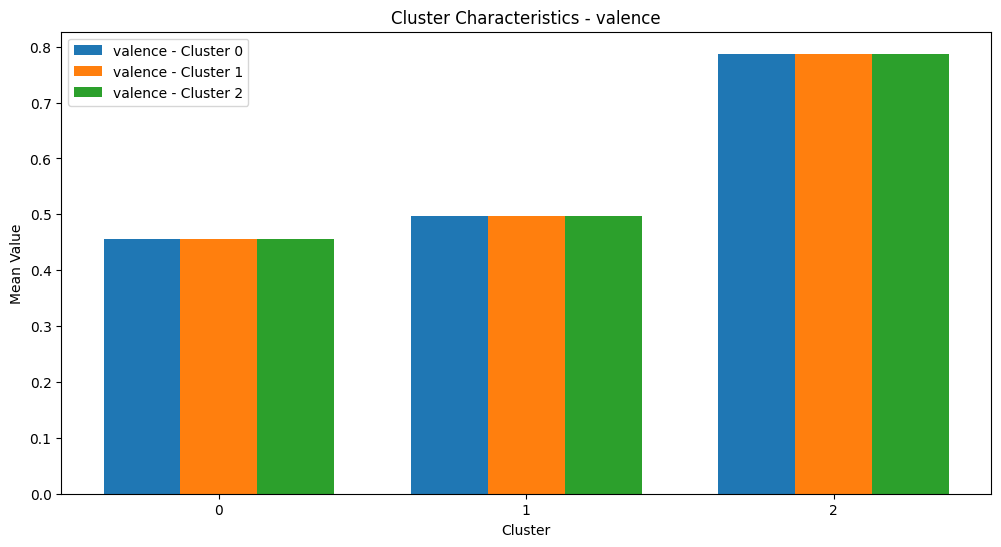

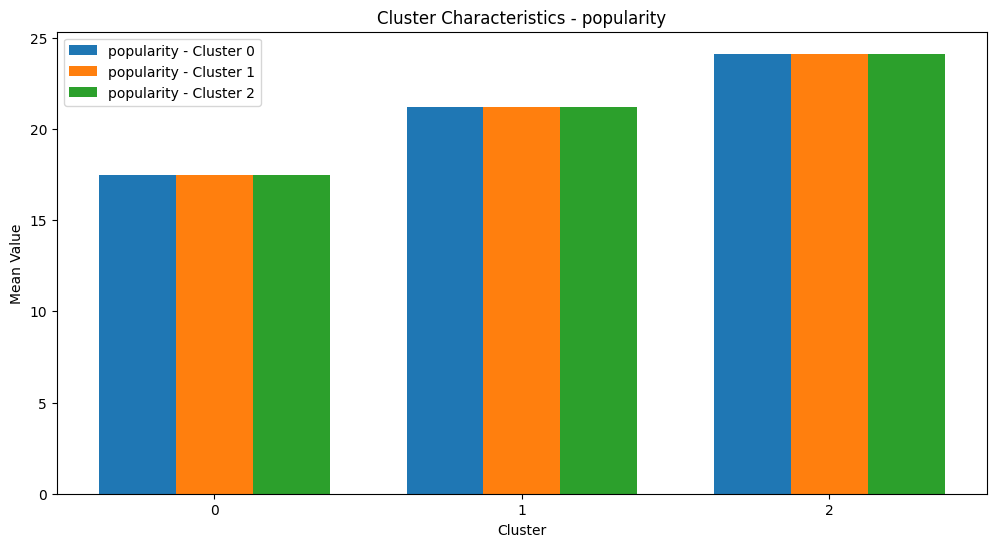

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming cluster_means is the DataFrame containing cluster characteristics
cluster_names = range(optimal_k)  # Use numerical indices for clusters

# Bar plot for each feature with clusters next to each other
for feature in selected_features:
    plt.figure(figsize=(12, 6))  # Increase the width to accommodate clustered bars
    bar_width = 0.25  # Adjust as needed

    for i in range(optimal_k):
        cluster_positions = np.arange(optimal_k) + i * bar_width
        plt.bar(cluster_positions, cluster_means[feature], width=bar_width, label=f'{feature} - Cluster {cluster_names[i]}')

    plt.title(f'Cluster Characteristics - {feature}')
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')
    plt.xticks(np.arange(optimal_k) + (bar_width * (optimal_k - 1)) / 2, cluster_names)  # Center x-ticks
    plt.legend()
    plt.show()



**3.3.1 Visual representation of the defined cluster using Radar Plots**

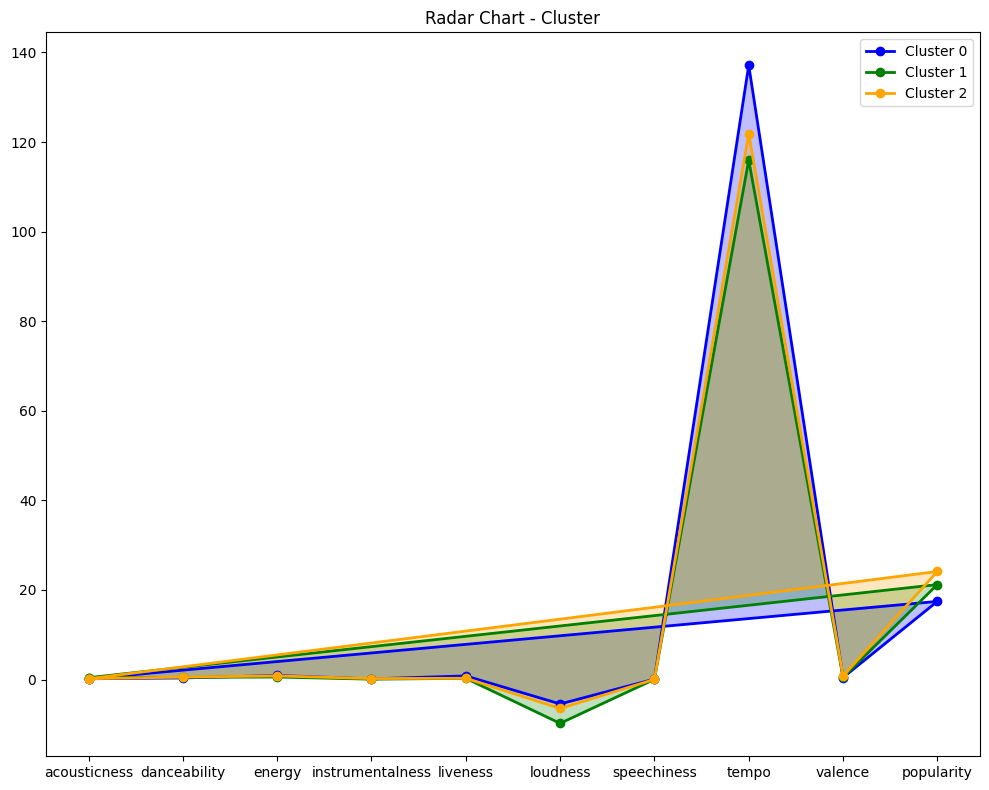

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot radar chart for each cluster
def plot_radar_chart(ax, cluster_means, cluster_name, color):
    categories = list(cluster_means.columns)
    values = cluster_means.loc[cluster_name].tolist()
    values += values[:1]

    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    ax.plot(angles, values, marker='o', linestyle='-', linewidth=2, label=f'Cluster {cluster_name}', color=color)
    ax.fill(angles, values, alpha=0.25, color=color)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(f'Radar Chart - Cluster')
    ax.legend()

# Radar chart for all clusters in a single plot
fig, ax = plt.subplots(figsize=(10, 8))

# Assign different colors to each cluster
colors = ['blue', 'green', 'orange']

for i, color in zip(range(optimal_k), colors):
    plot_radar_chart(ax, cluster_means, i, color)

plt.tight_layout()
plt.show()


## Observation

**Acousticness:** Cluster 1 has the highest bar for acousticness, indicating that songs in Cluster 1 are, on average, more acoustic compared to other clusters.


**Danceability:** Cluster 2 has the highest bar for danceability, suggesting that songs in Cluster 2 are, on average, more danceable compared to other clusters.


**Energy:** Cluster 0 has the highest bar for energy, implying that songs in Cluster 0 have, on average, more energy compared to other clusters. Cluster 2 is also relatively high on energy.


**Instrumentalness:** Cluster 2 has the highest bar for instrumentalness, indicating that songs in Cluster 2 are, on average, more instrumental compared to other clusters.


**Liveness:** Cluster 0 has the highest bar for liveness, suggesting that songs in Cluster 0 have, on average, more liveness compared to other clusters. Cluster 2 is also relatively high on liveness.


**Loudness:** Cluster 0 has the lowest negative bar for loudness, suggesting that songs in Cluster 0 have, on average, more loudness compared to other clusters. Cluster 1 is the highest on loudness.


**Speechiness:** Cluster 0 has the highest bar for speechiness, indicating that songs in Cluster 0 have, on average, more speech-like elements compared to other clusters.


**Tempo:** All clusters seem to be close to each other with reference to the tempo. Comparatively, Cluster 0 has the highest bar for tempo.


**Valence:** Cluster 2 has the highest bar for valence, suggesting that songs in Cluster 2 are, on average, more positive or cheerful compared to other clusters.


**Popularity:** Cluster 2 has the highest bar for popularity, indicating that songs in Cluster 2 are, on average, more popular. Cluster 1 is the next popular cluster.